<center>
    <h1> ILI286 - Computación Científica II </h1>
    <h2> Tarea 3 </h2>
    <h2> Daniel Francisco Tapia Rybertt </h2>
    <h2> Rol: 2969505-9 </h2>
    
    <h2> [S]cientific [C]omputing [T]eam </h2>
</center>

_Marzo 2017_

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Desarrollo y análisis de resultados](#develop)
* [3.- Conclusiones](#conclusions)
* [4.- Referencias](#ref)

<div id='obj' />
# 1. Objetivos

Los objetivos de esta tarea son:

* Estudio de las técnicas basadas en diferencias finitas.
* Aplicación de diferencias finitas en un problema con 3 dimensiones (2 espaciales y 1 temporal).
* Resolución de la ecuación de calor y aplicación en el procesamiento de imágenes.

<div id='widgets' />
# 2. Uso de widgets

A continuación se muestra un ejemplo de como utilizar los <i>widgets</i>.

In [1]:
# Libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from scipy.misc import factorial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Exponential function
X = np.arange(-2, 2, 0.01)
Y = np.exp(X)

def using_widget(k):
    fig = plt.figure()
    x = np.arange(-2, 2, 0.01)
    y = np.zeros(x.shape)
    # Approximation by Taylor Series
    for i in range(0,k+1):
        y = y + x**i/factorial(i)
    plt.plot(x,y, 'r',label='Aproximación por serie de Taylor')
    plt.plot(X, Y, 'g',label='$\exp(x)$')
    plt.legend(loc='best')
    
    plt.grid(True)
    plt.xlabel('$x$')
    plt.show()

interact(using_widget, k=widgets.IntSlider(min=1,max=20,step=1,value=1))

<function __main__.using_widget>

<div id='heateq' />
# 3. Ecuación de calor en 2D (30 pts)

Considere la siguiente ecuación diferencial parcial, correspondiente a la ecuación de calor definida en un dominio $(x,y) \in [0,10]^2$ y $0 < t < T_{\max}$:

\begin{align}
u_t &= \alpha\, \Delta u \\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1) \\
u(x,y,0) = f(x,y) &= \dfrac{x\,y\,(x-10)\,(y-10)}{x+3}, \quad (x,y) \in [0,10]^2
\end{align}

donde $u(\Gamma, t)$ es la función $u$ evaluada en la frontera $\Gamma$ del dominio y $\dfrac{\partial u}{\partial \mathbf{n}}$ es el gradiente de $u$ producto punto el vector normal $\mathbf{n}$ apuntando hacia fuera del dominio.




4. Su solución debería ser un "cubo" de tamaño $(N_x, N_y, N_t)$. Muestre gráficamente mediante <i>widgets</i> con 2 <i>slides</i> la solución encontrada (donde el primer <i>slide</i> modifica el momento $t$ visualizado y el segundo <i>slide</i> modifica el coeficiente $c$ de la condición). Use un gráfico 3D para visualizar la forma de la solución.

### 3.1

Aplique diferencias finitas en la <i>PDE</i> y expréselo en términos de los índices $i,j,k$ al aplicar un esquema explícito, donde $i$ está relacionado con la discretización de la variable $x$, $j$ está relacionado con la variable $y$ y $k$ está relacionado con el tiempo $t$.

\begin{align}
u_t = \alpha\Delta u \\
u_t = \alpha(\frac{d^2u}{dx^2} + \frac{d^2u}{dy^2}) \\
\frac{W_{i,j,k+1} - W_{i,j,k} }{\Delta k} = \alpha (\frac{W_{i-1,j,k} -2W_{i,j,k} + W_{i+1,j,k}}{\Delta x^2} + \frac{W_{i,j-1,k} - 2W_{i,j,k} + W_{i,j+1,k}}{\Delta y^2}) \\
\end{align}


Asumiendo que  $\Delta x = i$  y $ \Delta y = j $ y generando un grid equispaciado $\Delta x = \Delta y = h$, se tiene la ecuacion de la siguiente forma

\begin{align}
W_{i,j,k+1} - W_{i,j,k}  = \frac{\alpha \Delta k}{h^2} (W_{i-1,j,k} -2W_{i,j,k} + W_{i+1,j,k} + W_{i,j-1,k} - 2W_{i,j,k} + W_{i,j+1,k}) \\
W_{i,j,k+1}  =  W_{i,j,k} + \frac{\alpha \Delta k}{h^2} (W_{i-1,j,k} -2W_{i,j,k} + W_{i+1,j,k} + W_{i,j-1,k} - 2W_{i,j,k} + W_{i,j+1,k}) \\
W_{i,j,k+1}  =  W_{i,j,k} + \frac{\alpha \Delta k}{h^2} (W_{i-1,j,k} + W_{i+1,j,k} + W_{i,j-1,k} + W_{i,j+1,k} - 4W_{i,j,k}) \\
\end{align}


\begin{align}
W_{i,j,k+1}  =   
\frac{\alpha \Delta k}{h^2} W_{i-1,j,k} + 
\frac{\alpha \Delta k}{h^2} W_{i+1,j,k} + 
(1-\frac{4 \alpha \Delta k}{h^2})W_{i,j,k} +
\frac{\alpha \Delta k}{h^2} W_{i,j-1,k} + 
\frac{\alpha \Delta k}{h^2} W_{i,j+1,k} \\
\sigma = \frac{\alpha \cdot \Delta k}{h^2} \\
W_{i,j,k+1}  =   
\sigma W_{i-1,j,k} + 
\sigma W_{i+1,j,k} + 
(1-4\sigma)W_{i,j,k} +
\sigma W_{i,j-1,k} + 
\sigma W_{i,j+1,k} \\
\end{align}

En caso de que $\Delta x$ sea distinto a  $\Delta y$ entonces el esquema cambia a.

\begin{align}
\sigma_x = \frac{\Delta k \alpha}{\Delta x^2}
\sigma_y = \frac{\Delta k \alpha}{\Delta y^2} \\
W_{i,j,k+1} = W_{i,j,k} + \sigma_x(W_{i+1,j,k}  - 2W_{i,j,k} + W_{i-1,j,k})  + \sigma_y (W_{i,j-1,k} - 2W_{i,j,k} + W_{i,j+1,k} ) \\
\end{align}



### 3.2

Determine el tipo de condición de frontera del problema. Explique como utilizar esta condición y la condición inicial para resolver numéricamente el problema. Además indique qué significa que $c = 0$ y $c = 1$.

A continuacion se dibuja el esquema que representa las condiciones de borde, como tambien su forma en el plano 2D

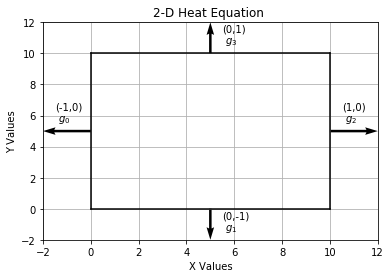

In [2]:
import matplotlib.pyplot as plt

X = np.linspace(0, 10, 10, endpoint=True)
Y = np.linspace(0, 10, 10, endpoint=True)

Y1 = np.ones(len(X))*10
Y2 = np.ones(len(X))*0

X1 = np.ones(len(Y))*10
X2 = np.ones(len(Y))*0

plt.plot(X, Y1, label='$u(x,y)$', c='black')
plt.plot(X, Y2, label='$u(x,y)$', c='black')
plt.plot(X1, Y, label='$u(x,y)$', c='black')
plt.plot(X2, Y, label='$u(x,y)$', c='black')
plt.quiver([5], [0], [0], [-2], angles='xy', scale_units='xy', scale=1)
plt.quiver([0], [5], [-2], [0], angles='xy', scale_units='xy', scale=1)
plt.quiver([10], [5], [2], [0], angles='xy', scale_units='xy', scale=1)
plt.quiver([5], [10], [0], [2], angles='xy', scale_units='xy', scale=1, label="g_0")


plt.grid(True)


plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("2-D Heat Equation ")
plt.text(5.5, -1.5, "(0,-1)\n $g_1$")
plt.text(-1.5, 5.5, "(-1,0)\n $g_0$")
plt.text(5.5, 10.5, "(0,1)\n $g_3$")
plt.text(10.5, 5.5, "(1,0)\n $g_2$")

# plt.legend(loc='best')

axes = plt.gca()
axes.set_xlim([-2,12])
axes.set_ylim([-2,12])

plt.show()

Las condiciones de borde estan constreñidas por las condiciones de robin

\begin{align}
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1) \\
\end{align}

En este caso se necesitan los cuatro normales $(-1,0), (0,-1), (1,0), (0,1) $ generando cuatro condiciones de bordes.

\begin{align}
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0\\
c\cdot u(\Gamma, t) + (1-c)\cdot \nabla u * \vec{n} = 0 \\
c\cdot u(\Gamma, t) + (1-c)\cdot (\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y})* \vec{n} = 0\\
\end{align}

Ahora hay que hacer forward difference y backward difference para los cuatro vectores normales.

\begin{align}
c\cdot u(\Gamma, t) + (1-c)\cdot (\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y})*(-1,0) = 0\\
c\cdot u(\Gamma, t) + (1-c)\cdot (\frac{-\partial u}{\partial x}) = 0\\
c\cdot W_{0,j,k} + (1-c)\cdot \frac{W_{1,j,k} - W_{0,j,k}}{h}= 0\\
(hc + 1 - c) W_{0,j,k} + (c-1) W_{1,j,k} = 0
\end{align}

Haciendo este mismo procedimiento para los otros 3 vectores normales se obtienen las siguientes 4 relaciones.
\begin{align}
\\
l = (hc + 1 - c) W_{0,j,k} + (c-1) W_{1,j,k} = 0 \\
b = (hc + 1 - c) W_{i,0,k} + (c-1) W_{i,1,k} = 0 \\
r = (hc + 1 - c) W_{5,j,k} + (c-1) W_{4,j,k} = 0 \\
t = (hc + 1 - c) W_{i,5,k} + (c-1) W_{i,4,k} = 0 \\ \\
\end{align}
Con cual obtenemos las condiciones de borde para todo dominio $ t> 0,k > 0$ y $\gamma = \frac{(1-c)}{(hc + 1 - c) }$quedando de la siguiente forma

\begin{align}
\\
W_{0,j,k}  = \gamma \cdot W_{1,j,k} \\
W_{i,0,k}  = \gamma \cdot W_{i,1,k} \\
W_{5,j,k}  = \gamma \cdot W_{4,j,k} \\
W_{i,5,k}  = \gamma \cdot W_{i,4,k} \\
\\
\end{align}

\begin{align*}
\begin{bmatrix}
 0 &  1 & 0  & \cdots & 0 & 0 & 0 \\
 0 &  1 & 0  & \cdots & 0 & 0 & 0 \\
 0 &  0 & 1  & \cdots & 0 & 0 & 0 \\
 0 &  0 & 0  & \ddots & 0 & 0 & 0 \\
 0 &  0 & 0  & 0 & 1 & 0 & 0\\
 0 &  0 & 0  & 0 & 0 & 1 & 0 \\
 0 &  0 & 0  & 0 & 0 & -1 & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
W_{0,0,k+1} \\ W_{1,0,k+1} \\ W_{2,0,k+1} \\ W_{3,0,k+1} \\ \vdots \\ 
W_{0,1,k+1} \\ W_{1,1,k+1} \\ W_{2,1,k+1} \\ W_{3,1,k+1} \\ \vdots \\ 
W_{0,2,k+1} \\ W_{1,2,k+1} \\ W_{2,2,k+1} \\ W_{3,2,k+1} \\ \vdots \\  
W_{i,j,k+1}
\end{bmatrix}
= \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots  & 0 \\ 
\sigma & \sigma & 1 - 4\sigma & \sigma & \sigma & 0 & 0 & \cdots & 0 \\ 
0 & \sigma & \sigma & 1 - 4\sigma & \sigma & \sigma & 0 & \cdots & 0 \\
0 & 0 & \sigma & \sigma & 1 - 4\sigma & \sigma & \sigma & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \sigma & \sigma & 1 - 4\sigma & \sigma & \sigma \\
0 & 0 &\cdots  & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}  \cdot
\begin{bmatrix}
W_{1,0,k} \\ W_{1,1,k} \\ W_{2,1,k} \\ W_{3,1,k} \\ \vdots \\ 
W_{0,1,k} \\ W_{1,2,k} \\ W_{1,3,k} \\ W_{1,4,k} \\ \vdots \\  
W_{i,j,k}
\end{bmatrix}
\end{align*}




\begin{align*}
\begin{bmatrix}
W_{1,1,k+1} \\ W_{2,1,k+1} \\ W_{3,1,k+1} \\ \vdots \\ 
W_{1,2,k+1} \\ W_{2,2,k+1} \\ W_{3,2,k+1} \\ \vdots \\  
W_{i,j,k+1}
\end{bmatrix}
= \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots  & 0 \\ 
\sigma & \sigma & 1 - 4\sigma & \sigma & \sigma & 0 & 0 & \cdots & 0 \\ 
0 & \sigma & \sigma & 1 - 4\sigma & \sigma & \sigma & 0 & \cdots & 0 \\
0 & 0 & \sigma & \sigma & 1 - 4\sigma & \sigma & \sigma & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \sigma & \sigma & 1 - 4\sigma & \sigma & \sigma \\
0 & 0 &\cdots  & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}  \cdot
\begin{bmatrix}
W_{1,0,k} \\ W_{1,1,k} \\ W_{2,1,k} \\ W_{3,1,k} \\ \vdots \\ 
W_{0,1,k} \\ W_{1,2,k} \\ W_{1,3,k} \\ W_{1,4,k} \\ \vdots \\  
W_{i,j,k}
\end{bmatrix}
\end{align*}

### 3.3
Construya el código para resolver el problema. Aplique operaciones vectorizadas. Tenga en consideración los problemas de estabilidad que podrían surgir de los valores de $\Delta x, \Delta y, \Delta t$. Considere $\alpha = 1$ y un $T_\max = 5$.

In [3]:
def f(x,y):
    return (x*y*(x-10)*(y-10))/(x+3)


def matchPoints(i,j, v, sigma):
#     print("i : %f" % (i))
#     print("j : %f" % (j))
#     print("V ALL: %f, Sigma: %f " %(v[j][i],sigma))
#     print(v[j][i])
    return sigma*v[j][i-1] + sigma*v[j][i+1] + (1-4*sigma)*v[j][i] + sigma*v[j-1][i] + sigma*v[j+1][i] 


def heatEquation(c, v, X , dx, Y, dy, T, dt, alpha=1):

    Xmax = X[1]
    Ymax = Y[1]
    Tmax = T[1]
    Nx = (Xmax-X[0])/(dx)
    Ny = (Ymax-Y[0])/(dy)
    Nt = (Tmax-T[0])/(dt)
    
    xvalues = np.linspace(X[0],Xmax,int(Nx+1))
    yvalues = np.linspace(Y[0],Ymax,int(Ny+1))
    tvalues = np.linspace(T[0], Tmax, int(Nt+1))
    
    [xx,yy] = np.meshgrid(xvalues, yvalues)
    u = xx    
    i = dx
    j = dy
    k = dt
    if(i == j):
        h=dy
    
    sigma = alpha*k/h**2
    gamma = (1-c)/(h*c+1 -c)
    start = 1
    
    print("H: %f" %(h))
    print("dx : %f" %(dx))
    print("dy : %f" %(dy))
    print("dk : %f" %(dt))
    print("alpha : %f " %(alpha) )
    print("sigma : %f " %(sigma) )
    print("c : %f " %(c) )
    print("iterations : %d" % (len(tvalues)))
    print("Is stable : ")
    stable = alpha*dt/min(dx**2,dy**2) < 1/2
    if(stable):
        print("Yes")
    else:
        print("No")
    if(stable):
        for w in tvalues:
            [uu1,vv1] = np.meshgrid(xvalues, yvalues)

            for i in range(start,len(xx[0])-1):
                for j in range(start, len(yy[0])-1):
                    point  = matchPoints(i,j,v,sigma)
            #         print("Point : %f" % (point))
                    vv1[j][i] = point

            for j in range(1,len(yy[0])-1): #LEFT
                vv1[j][0] = gamma*vv1[j][1]

            for j in range(1,len(yy[0])-1): #RIGHT
                vv1[j][Xmax] = gamma*vv1[j][Xmax-1]

            for i in range(1,len(xx[0])-1): #BOTTOM
                vv1[0][i] = gamma*vv1[1][i]

            for i in range(1,len(xx[0])-1): #BOTTOM
                vv1[Ymax][i] = gamma*vv1[Ymax-1][i]

            #Corners
            vv1[0][0] = (vv1[0][1]+vv1[1][0])/2
            vv1[0][Xmax] = (vv1[1][Xmax]+vv1[0][Xmax-1])/2
            vv1[Ymax][Xmax] = (vv1[Ymax-1][Xmax]+vv1[Ymax][Xmax-1])/2
            vv1[Ymax][0] = (vv1[Ymax][1]+vv1[Ymax-1][0])/2

            u = uu1
            v = vv1
    
    return v

    # Add a color bar which maps values to colors.
    
    
    
#     plt.show()
    


### 3.4

Su solución debería ser un "cubo" de tamaño $(N_x, N_y, N_t)$. Muestre gráficamente mediante <i>widgets</i> con 2 <i>slides</i> la solución encontrada (donde el primer <i>slide</i> modifica el momento $t$ visualizado y el segundo <i>slide</i> modifica el coeficiente $c$ de la condición). Use un gráfico 3D para visualizar la forma de la solución.

In [4]:
def using_widget(dt, c):

    
    X = [0,10]
    Y = [0, 10]
    T = [0, 5]
    dx = 1
    dy = 1
    
    Xmax = X[1]
    Ymax = Y[1]
    Tmax = T[1]
    Nx = (Xmax-X[0])/(dx)
    Ny = (Ymax-Y[0])/(dy)
    Nt = (Tmax-T[0])/(dt)
    #    (c, v, X , dx, Y, dy, T, dt):
    xvalues = np.linspace(X[0],Xmax,int(Nx+1))
    yvalues = np.linspace(Y[0],Ymax,int(Ny+1))
    tvalues = np.linspace(T[0], Tmax, int(Nt+1))

    [xx,yy] = np.meshgrid(xvalues, yvalues)
    u = xx
    v = f(xx,yy)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(xx, yy, v, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
    ax.set_zlim(0, 70.01)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

    vv1 = heatEquation(c,v, X, dx, Y, dy,T,dt,alpha=1)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(xx, yy, vv1, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
    ax.set_zlim(0, 70.01)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    

interact(using_widget, dt=widgets.FloatSlider(min=0.1,max=1,step=0.01,value=0.1), c=widgets.FloatSlider(min=0,max=1,step=0.01,value=0))





<function __main__.using_widget>

Inicialmente la superficie se encuentra caliente en el centro y los bordes frios.
El valor de $c$ determina como se calienta la frontera, para valores de c muy chicos (cercanos a 0) este se calienta por un costado izquierdo mientras que se deja frio en el costado derecho. Aumentando el valor de $c$ hace que se caliente el centro y los bordes se enfrien. El valor de $c$ determina la distribucion o densidad de calor dentro de la superficie.

<div id='heateq-image' />
# 4. Aplicación de la ecuación de calor en imágenes: <i> Blurring </i> (40 pts)

La ecuación de calor logra una difusión, en base a las condiciones entregadas. Aplicado en imágenes logramos un efecto de <i> blur </i> en la imagen. Consideremos el siguiente problema:

\begin{align}
    u_t &= \alpha\,\Delta u \\
    u(x,y,0) &= I(x,y) \\
    c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

donde $I(x,y)$ es una imagen. Consideremos $\alpha = 1$ por simplicidad.






4. Aplique su código a la imagen. Luego de obtener la solución utilize un <i> widget </i> con dos <i>slides</i>: el primero para visualizar la imagen en cada tiempo obtenido y el segundo variando el parámetro $c \in (0,1)$. ¿Se consigue el efecto de <i> blur </i> en la imagen?.

5. Explique el efecto del parámetro $c$ en la imagen. ¿cuál es el $c$ óptimo para obtener un buen efecto de <i>blur</i>?.

### 4.1

1. Cargue la imagen <i>mandrill.png</i> (adjunta en esta tarea) como escala de grises, normalice sus valores (respecto a la escala de grises) y transfórmela a un <i>array</i> de <i>Numpy</i>. Visualice la imagen y su dimensión.

('R', 'G', 'B')
Size: 512 x 512 


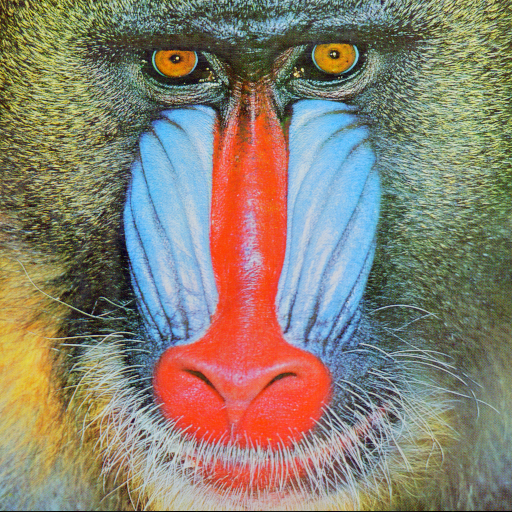

('L',)
Size: 512 x 512 


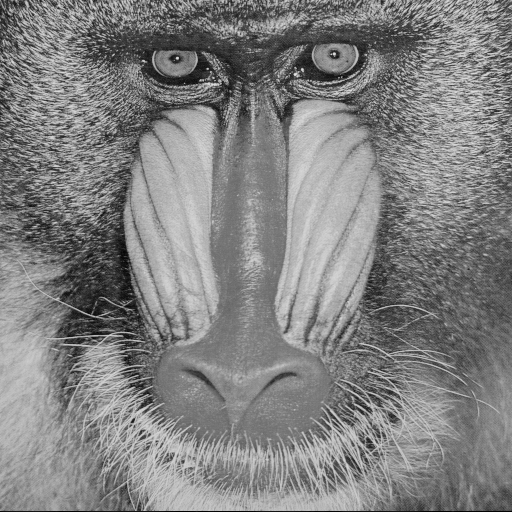

[[145  55  48 ..., 112 153 177]
 [116 101  39 ..., 129 148 125]
 [ 76 114  46 ..., 100  88  81]
 ..., 
 [140 145 140 ...,  82  89  78]
 [155 140 131 ...,  78  79  68]
 [ 10  11  13 ...,   6   3   4]]


In [5]:
import IPython.display as dp
import numpy
from PIL import Image

def loadImage(path):
    return Image.open(path, mode="r")

def PIL2array(img):
    arr = numpy.array(img).reshape(img.height,img.width,3)
    return arr
    

def array2PIL(arr):
    imgFinal = Image.fromarray(arr,mode='L')
    return imgFinal


img = loadImage("mandrill.png")
print(img.getbands())
print("Size: %d x %d " % (img.height, img.width))
dp.display_png(img)

grayscale = np.zeros((img.height,img.width),dtype=np.uint8)
arr = PIL2array(img)

for i in range(0,img.height):
    for j in range(0, img.width):
        pixel = 0.3 * arr[i][j][0] + 0.59 * arr[i][j][1] + 0.11 * arr[i][j][2]
        grayscale[i][j] = pixel
img2 = array2PIL(grayscale)

print(img2.getbands())
print("Size: %d x %d " % (img2.height, img2.width))
dp.display_png(img2)
print(grayscale)

### 4.2
Programe una función que resuelva la ecuación de calor propuesta. Para este punto es importante considerar algunos aspectos:
   1. La ecuación se resuelve sobre un dominio, y sobre este dominio debemos aplicar valores $\Delta x, \Delta y$ que se estimen convenientes. Para este problema el dominio es entregado por la imagen, por lo que tenemos cierta "flexibilidad" para escogerlo. Si la dimensión de la imagen es $(N,M)$ entonces pueden tomarse, convenientemente, el dominio espacial como $[0,N-1]\times[0,M-1]$ y con esto tomar $(N,M)$ puntos equiespaciados por $\Delta x = 1, \Delta y = 1$. Es decir estamos tomando como cada punto de la "discretización" como un píxel de la imagen.
   2. Recuerde que la imagen representa su función de condición inicial. Dado lo explicado anteriormente, si generamos $N$ y $M$ puntos y denotamos la imagen por $I(x,y)$, tenemos que $I(x_i,y_j)$ equivale al píxel $(i,j)$ (recordar que estamos tomando $\Delta x = 1, \Delta y = 1$.
   3. Tenga en consideración los valores necesarios para que el problema sea estable.
   4. El efecto de blur es progresivo. Considerando que $t$ está acotado por $0 < t \leq T_\max$, esto quiere decir que mientras más grande sea $T_\max$, más tiempo se está entregando para que la imagen se vea afectada por el efecto de <i>blur</i>. Para visualizar esto considere $T_\max = 30$.

H: 1.000000
dx : 1.000000
dy : 1.000000
dk : 0.250000
alpha : 1.000000 
sigma : 0.250000 
c : 0.700000 
iterations : 121
Is stable : 
Yes


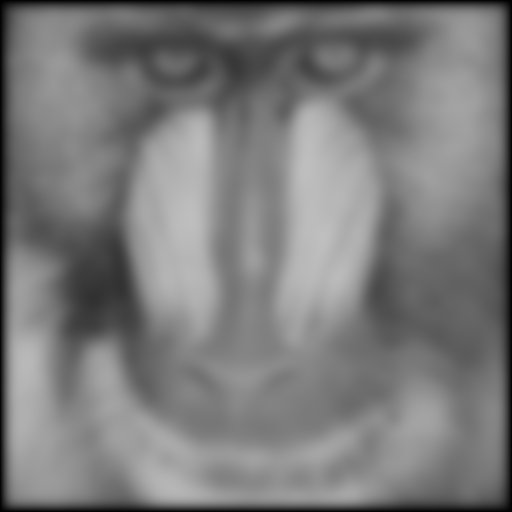

In [7]:
# def using_widget2(dt, c):
# interact(using_widget2, dt=widgets.FloatSlider(min=0.1,max=1,step=0.1,value=1), c=widgets.FloatSlider(min=0,max=1,step=0.01,value=0))

c = 0.7
N = 512
M = 512
X = [0,N-1]
Y = [0, M-1]
T = [0, 30]
dx = 1
dy = 1
dt = 0.25

v = grayscale

vv1 = heatEquation(c, v, X, dx, Y,dy, T,dt,alpha=1)
vv2 = np.zeros((X[1]+1,Y[1]+1),dtype=np.uint8)

for i in range(0,Y[1]+1):
    for j in range(0, X[1]+1):
        pixel = vv1[i][j]
        vv2[i][j] = pixel
img3 = array2PIL(vv2)
# print(len(vv2))
dp.display_png(img3)

Aca se puede ver que se logro el efecto blurred, ya que la imagen se puede notar que esta el mandril detras. Al no ser estable $(\sigma < 0.5)$ la matriz de escala de grises se vuelve inestable, alcansando valores de pixel muy elevados, esto es que la matriz de escala de grises se mueve entre los valores [0,255], al elegir un $\sigma < 0.5$ estos valores se disparan y se obtienen valores mayor a 100,000,000,000!!!, impidiendo que estos valores puedan ser almacenados en un tipo de dato long, generando un crash en el notebook.

Cuando $c = 0$, el valor de la ecuacion de borde se reduce a  $\nabla_{\vec{n}}u = 0$ Lo que logra que la imagen se difunda mejor ya que sus pixeles vecinos no son 0 y tienen intensidad luminosa. Si $c=1$ entonces los bordes son siempre $0$ y la calidad en los bordes se pierde.

<div id='revheateq-image' />
# 5. Otra aplicación de la ecuación de calor: <i> Deblur </i> (30 pts)

En la sección anterior pudo aplicar la ecuación de calor a una imagen. **¿Será este proceso reversible?**. Dicho de otra manera, si tengo una imagen con <i>blur</i>, ¿puedo recuperar la imagen original?. Este problema se plantea de la siguiente manera:

\begin{align}
u_t &= \alpha\, \Delta u\\
u(x,y,\tau) &= I_\tau(x,y)\\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

donde $I_\tau(x,y)$ es la imagen procesada o con efecto <i>blur</i>. Esto es un problema de valor final --- recuerde
que nosotros hemos trabajado problemas de valor incial. En este contexto, tenemos que $\tau$ es el tiempo en cuestión (tiempo hasta donde avanzó la ecuación de calor). Entonces estamos buscando la condición incial $I(x,y)$ que me lleva a $I_\tau(x,y)$. Este problema puede reducirse a la siguiente <i>PDE</i>:

\begin{align}
u_t &= -\widetilde{\alpha}\,\Delta u\\
u(x,y,0) &= I_\tau(x,y)\\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

Esto es posible en cierta medida, para saltos pequeños de tiempo. Es decir, **¡debemos retroceder el tiempo!**

1. Carge la imagen adjunta llamada <b>blurred.tiff</b> y visualícela utilizando la función adjunta en esta sección. Indique que significa el histograma que entrega.

2. Construya un código para resolver numéricamente este problema. En esta parte, la imagen adjunta será la condición inicial. Considere $\widetilde{\alpha} = 1$ en la segunda PDE o equivalentemente $\alpha=-1$ en la primera PDE. Considere el valor de $c$ óptimo, considerando lo obtenido en la sección anterior. Además considere $\tau = 30$ (o $T_\max = 30$ usando la notación de los problemas anteriores).

3. Resuelva el problema y visualícelo utilizando un <i> widget </i> con 2 <i>slides</i>: el primero para variar el tiempo visualizado y el segundo para variar el parámetro $\Delta t$. Utilice la función adjunta para visualizar la imagen y el histograma. ¿Se puede revertir el efecto en la imagen?, ¿qué ocurre después de harto tiempo?, ¿Qué ocurre con la distribución (entragada por el histograma) a medida que avanza el tiempo?, ¿podemos utilizar esto de alguna manera?, ¿qué puede concluir respecto al efecto de $\Delta t$ sobre el algoritmo?. Varíe $\Delta t \in (0.1, 5)$.

<PIL.TiffImagePlugin.TiffImageFile image mode=F size=506x383 at 0x110F8EC18>
{'compression': 'raw', 'dpi': (1, 1), 'resolution': (1, 1)}
{256: 506, 257: 383, 258: (32,), 259: 1, 278: 383, 262: 1, 273: (134,), 339: (3,), 279: (775192,), 284: 1}


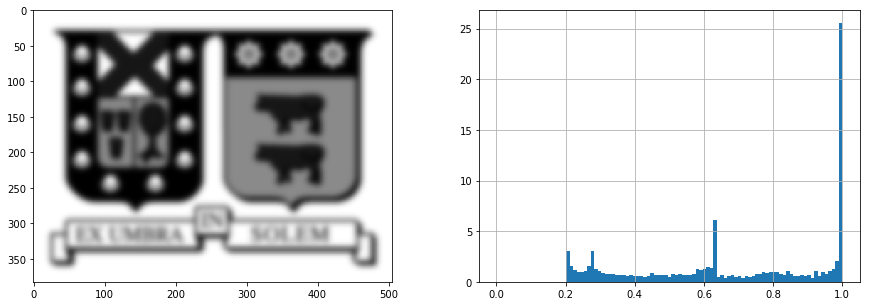

In [8]:
# Bibliotecas para el ejemplo
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
%matplotlib inline

# Imagen (en su caso, debe ser la imagen adjunta)
im = Image.open('blurred.tiff')
# print(im.getbands())
# print("Size: %d x %d " % (im.height, im.width))
print(im)
print(im.info)

print(im.tag_v2)
imarray = numpy.array(im)
blurred_image = imarray


# Función auxiliar para mostrar la imagen y el histograma. Los parámetros k y dt son entregados por el slide.
#  im: imagen a mostrar.
def show_imhist(im):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    # Mostrar imagen en tiempo k
    plt.imshow(im, cmap='gray')
    
    # Mostrar histograma
    plt.subplot(1,2,2)
    bins=np.linspace(0,1,100)
    plt.hist(im.flatten() ,bins=bins, normed=True)
    plt.grid(True)
    
    plt.show()

show_imhist(blurred_image)

A continuacion se puede observar la imagen en formato tiff, y el histograma, que refelja la densidad de pixeles por valor de pixel toda la imagen, siendo los piexeles con valor 1 los mas frecuetes siendo este el color predominante por lo general fuera del logo.


### 5.2

Construya un código para resolver numéricamente este problema. En esta parte, la imagen adjunta será la condición inicial. Considere $\widetilde{\alpha} = 1$ en la segunda PDE o equivalentemente $\alpha=-1$ en la primera PDE. Considere el valor de $c$ óptimo, considerando lo obtenido en la sección anterior. Además considere $\tau = 30$ (o $T_\max = 30$ usando la notación de los problemas anteriores).

In [9]:
c = 0.7
N = 383
M = 506
X = [0,N-1]
Y = [0, M-1]
T = [0, 30]
dx = 1
dy = 1
dt = 0.3

v = blurred_image

vv1 = heatEquation(c, v, X, dx, Y,dy, T,dt,alpha=-1)
vv2 = np.zeros((X[1]+1,Y[1]+1),dtype=np.uint8)

for i in range(0,Y[1]+1):
    for j in range(0, X[1]+1):
        pixel = vv1[i][j]
        vv2[i][j] = pixel
img4 = array2PIL(vv2)
# print(len(vv2))
dp.display_png(img4)

H: 1.000000
dx : 1.000000
dy : 1.000000
dk : 0.300000
alpha : -1.000000 
sigma : -0.300000 
c : 0.700000 
iterations : 101
Is stable : 
Yes


OverflowError: Python int too large to convert to C long

No se puede recuperar la imagen, existe un poco de recuperacion pero nada muy notorio. Lo que si es notorio que despues de muchas iteraciones la imagen ya no se nota nada y se ve negra o los valores hacen un overflow.

# Concluciones


 * Los pixeles para una imagen de grayscale pasados desde RGB son 8bits signed integers
 * Los pixeles para una imagen pueden tambien ser 32-bit signed float, aumentando la precision de iluminosidad de los pixeles.
 * La ecuacion de calor tiene problemas para ser resuelto en los bordes, esto depende exclusivamente del metodo usado para aproximar los bordes como tambien el valor de $c$ que ayuda a minimizar y maximizar valores de la frontera. 
 * No es posible recuperar los valores de una imagen blurred
 * No lograr estabilidad implica que los valores se disparen.

<div id='instr' />
# 4. _Instrucciones_:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las bibliotecas extras utilizadas.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

<div id='ref' />
# 5. _Referencias_:

* 1.- Uso y ejemplos de _timeit_:
 - https://docs.python.org/2/library/timeit.html
* Magic _timeit_:
 - http://stackoverflow.com/questions/29280470/what-is-timeit-in-python
* 2.- Uso de libreria _time_:
 - https://docs.python.org/2/library/time.html
* 3 - Complexity of numpy.linalg.solve: 
 - http://www.netlib.org/lapack/lug/node71.html
* 4 - Complexity of QR decomposition: 
 - https://en.wikipedia.org/wiki/QR_decomposition
 